In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/medical_records.csv")

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
0,55.0,non-anaemitic,748,non-diabetic,45,not-present,263000.00,1.30,137,Male,No,88,10106,0.0
1,60.0,anaemitic,95,non-diabetic,60,not-present,337000.00,1.00,138,Male,Yes,146,10175,0.0
2,50.0,anaemitic,121,diabetic,40,not-present,260000.00,0.70,130,Male,No,175,10192,0.0
3,59.0,anaemitic,176,diabetic,25,not-present,221000.00,1.00,136,Male,Yes,150,10181,1.0
4,45.0,non-anaemitic,292,diabetic,35,not-present,850000.00,1.30,142,Male,Yes,88,10109,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,86.0,non-anaemitic,582,non-diabetic,38,not-present,263358.03,1.83,134,Female,No,95,10119,1.0
342,44.0,non-anaemitic,582,diabetic,30,present,263358.03,1.60,130,Male,Yes,244,10270,0.0
343,42.0,non-anaemitic,5209,non-diabetic,30,not-present,226000.00,1.00,140,Male,Yes,87,10103,0.0
344,60.0,non-anaemitic,235,diabetic,38,not-present,329000.00,3.00,142,Female,No,30,10039,1.0


In [ ]:
df2 = df[df['DEATH_EVENT'].isnull()]

In [ ]:
df2.reset_index(inplace = True,drop = True)

In [ ]:
df2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
0,45.0,non-anaemitic,292,diabetic,35,not-present,850000.00,1.30,142,Male,Yes,88,10109,NaN
1,45.0,non-anaemitic,582,non-diabetic,20,present,126000.00,1.60,135,Male,No,180,10194,NaN
2,60.0,anaemitic,47,non-diabetic,20,not-present,204000.00,0.70,139,Male,Yes,73,10075,NaN
3,51.0,non-anaemitic,1380,non-diabetic,25,present,271000.00,0.90,130,Male,No,38,10046,NaN
4,75.0,non-anaemitic,582,diabetic,30,present,263358.03,1.83,134,Female,No,23,10024,NaN
5,70.0,non-anaemitic,571,diabetic,45,present,185000.00,1.20,139,Male,Yes,33,10042,NaN
6,50.0,anaemitic,115,non-diabetic,20,not-present,189000.00,0.80,139,Male,No,146,10173,NaN
7,55.0,non-anaemitic,582,diabetic,35,present,371000.00,0.70,140,Female,No,197,10219,NaN
8,55.0,non-anaemitic,60,non-diabetic,35,not-present,228000.00,1.20,135,Male,Yes,90,10111,NaN
9,40.0,non-anaemitic,624,non-diabetic,35,not-present,301000.00,1.00,142,Male,Yes,214,10248,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
0,55.0,non-anaemitic,748,non-diabetic,45,not-present,263000.00,1.30,137,Male,No,88,10106,0.0
1,60.0,anaemitic,95,non-diabetic,60,not-present,337000.00,1.00,138,Male,Yes,146,10175,0.0
2,50.0,anaemitic,121,diabetic,40,not-present,260000.00,0.70,130,Male,No,175,10192,0.0
3,59.0,anaemitic,176,diabetic,25,not-present,221000.00,1.00,136,Male,Yes,150,10181,1.0
4,79.0,anaemitic,55,non-diabetic,50,present,172000.00,1.80,133,Male,No,78,10083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,86.0,non-anaemitic,582,non-diabetic,38,not-present,263358.03,1.83,134,Female,No,95,10119,1.0
282,44.0,non-anaemitic,582,diabetic,30,present,263358.03,1.60,130,Male,Yes,244,10270,0.0
283,42.0,non-anaemitic,5209,non-diabetic,30,not-present,226000.00,1.00,140,Male,Yes,87,10103,0.0
284,60.0,non-anaemitic,235,diabetic,38,not-present,329000.00,3.00,142,Female,No,30,10039,1.0


In [ ]:
#checking for duplicates
duplicate_val = df.duplicated()
print(duplicate_val.sum())
#print(duplicate_val)
df[duplicate_val]

47


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
76,49.000,non-anaemitic,789,non-diabetic,20,present,319000.00,1.10,136,Male,Yes,55,10058,1.0
80,45.000,anaemitic,981,non-diabetic,30,not-present,136000.00,1.10,137,Male,No,11,10012,1.0
84,55.000,non-anaemitic,336,non-diabetic,45,present,324000.00,0.90,140,Female,No,74,10079,0.0
88,40.000,non-anaemitic,90,non-diabetic,35,not-present,255000.00,1.10,136,Male,Yes,212,10242,0.0
89,61.000,non-anaemitic,582,diabetic,38,not-present,147000.00,1.20,141,Male,No,237,10264,0.0
93,60.667,anaemitic,151,diabetic,40,present,201000.00,1.00,136,Female,No,172,10188,0.0
94,62.000,non-anaemitic,281,diabetic,35,not-present,221000.00,1.00,136,Female,No,108,10138,0.0
130,50.000,anaemitic,121,diabetic,40,not-present,260000.00,0.70,130,Male,No,175,10192,0.0
131,68.000,anaemitic,646,non-diabetic,25,not-present,305000.00,2.10,130,Male,No,108,10137,0.0
137,85.000,non-anaemitic,23,non-diabetic,45,not-present,360000.00,3.00,132,Male,No,28,10031,1.0


In [ ]:
#dropping duplictes to avoid overfitting 
df.drop_duplicates(inplace = True)

In [ ]:
#duplicate_val = df.duplicated()
#print(duplicate_val.sum())

duplicate_val2 = df2.duplicated()
print(duplicate_val2.sum())

0


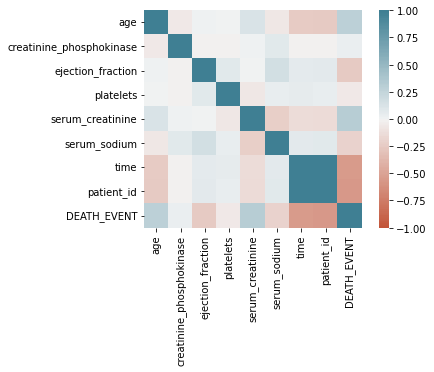

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

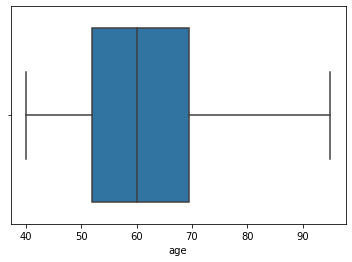

error


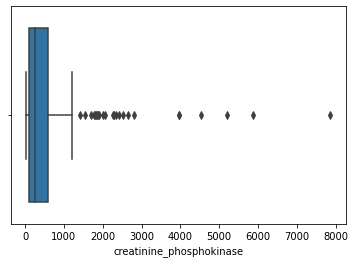

error


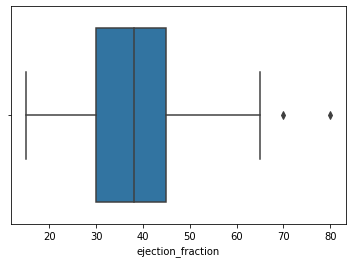

error


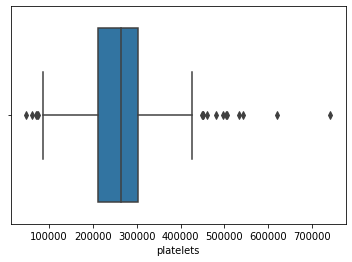

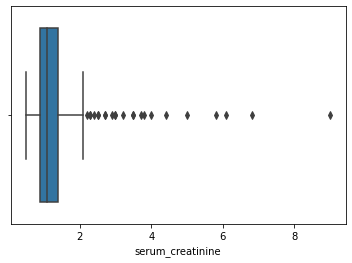

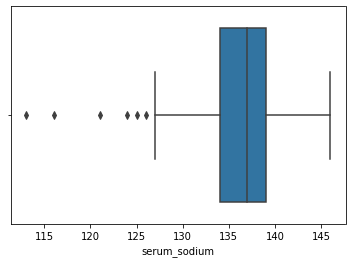

error
error


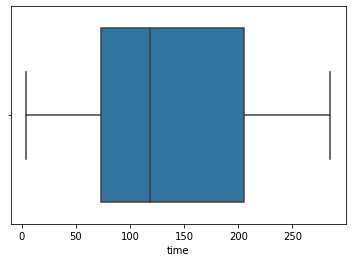

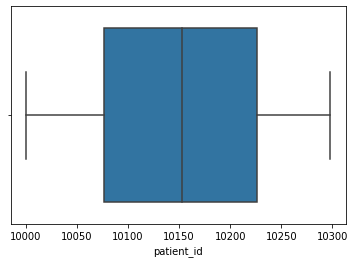

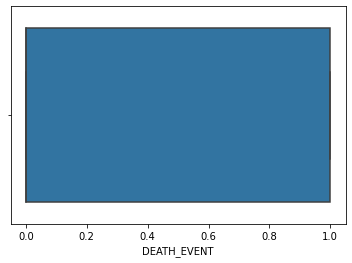

In [ ]:
for col in df.columns:
  try:
    sns.boxplot(df[col])
    plt.show()
  except:
    print("error")

In [ ]:
#removing outliers
print(df['creatinine_phosphokinase'].quantile(0.50)) 
print(df['creatinine_phosphokinase'].quantile(0.95)) 
df['creatinine_phosphokinase'] = np.where(df['creatinine_phosphokinase'] > 2320.75, 250.0, df['creatinine_phosphokinase'])
df.describe()

245.0
2263.0


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,patient_id,DEATH_EVENT
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,61.059975,403.899582,38.263598,262427.450209,1.387364,136.418410,132.297071,10151.389121,0.297071
std,11.999013,442.639987,11.651161,94272.495618,0.994975,4.440152,78.350857,87.000792,0.457927
min,40.000000,23.000000,15.000000,47000.000000,0.500000,113.000000,4.000000,10000.000000,0.000000
25%,52.000000,111.500000,30.000000,212500.000000,0.900000,134.000000,73.500000,10076.000000,0.000000
50%,60.000000,245.000000,38.000000,263000.000000,1.100000,137.000000,119.000000,10153.000000,0.000000
75%,69.500000,582.000000,45.000000,303500.000000,1.400000,139.000000,205.500000,10226.500000,1.000000
max,95.000000,2281.000000,80.000000,742000.000000,9.000000,146.000000,285.000000,10298.000000,1.000000


In [ ]:
#removing outliers
print(df['serum_creatinine'].quantile(0.50)) 
print(df['serum_creatinine'].quantile(0.95)) 
df['serum_creatinine'] = np.where(df['serum_creatinine'] > 3.0, 1.1, df['serum_creatinine'])
df.describe()

1.1
3.0199999999999987


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,patient_id,DEATH_EVENT
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,61.059975,403.899582,38.263598,262427.450209,1.196569,136.418410,132.297071,10151.389121,0.297071
std,11.999013,442.639987,11.651161,94272.495618,0.442688,4.440152,78.350857,87.000792,0.457927
min,40.000000,23.000000,15.000000,47000.000000,0.500000,113.000000,4.000000,10000.000000,0.000000
25%,52.000000,111.500000,30.000000,212500.000000,0.900000,134.000000,73.500000,10076.000000,0.000000
50%,60.000000,245.000000,38.000000,263000.000000,1.100000,137.000000,119.000000,10153.000000,0.000000
75%,69.500000,582.000000,45.000000,303500.000000,1.300000,139.000000,205.500000,10226.500000,1.000000
max,95.000000,2281.000000,80.000000,742000.000000,3.000000,146.000000,285.000000,10298.000000,1.000000


In [ ]:
dummy_anaemia_train = pd.get_dummies(df.anaemia, prefix="anaemia")
dummy_diabetes_train = pd.get_dummies(df['diabetes'], prefix="diabetes")
dummy_high_blood_pressure_train = pd.get_dummies(df['high_blood_pressure'], prefix='high_blood_pressure')
dummy_sex_train = pd.get_dummies(df['sex'], prefix='sex')
dummy_smoking_train = pd.get_dummies(df['smoking'], prefix='smoking')
#dummy_exp_test = pd.get_dummies(df.anaemia, prefix="anaemia")
#dummy_mode_test = pd.get_dummies(test_data['mode'], prefix="mode")
df = df.drop(["anaemia", "diabetes",'high_blood_pressure','sex','smoking'], axis=1)
#test_data = test_data.drop(['explicit', 'mode'], axis=1)
df = pd.concat([df, dummy_anaemia_train,dummy_diabetes_train,dummy_high_blood_pressure_train,dummy_sex_train,dummy_smoking_train ], axis=1)
#test_data = pd.concat([test_data, dummy_exp_test, dummy_mode_test], axis=1)

In [ ]:
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,patient_id,DEATH_EVENT,anaemia_anaemitic,anaemia_non-anaemitic,diabetes_diabetic,diabetes_non-diabetic,high_blood_pressure_not-present,high_blood_pressure_present,sex_Female,sex_Male,smoking_No,smoking_Yes
0,55.0,748.0,45,263000.00,1.30,137,88,10106,0.0,0,1,0,1,1,0,0,1,1,0
1,60.0,95.0,60,337000.00,1.00,138,146,10175,0.0,1,0,0,1,1,0,0,1,0,1
2,50.0,121.0,40,260000.00,0.70,130,175,10192,0.0,1,0,1,0,1,0,0,1,1,0
3,59.0,176.0,25,221000.00,1.00,136,150,10181,1.0,1,0,1,0,1,0,0,1,0,1
4,79.0,55.0,50,172000.00,1.80,133,78,10083,0.0,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,65.0,720.0,40,257000.00,1.00,136,210,10238,0.0,1,0,1,0,1,0,1,0,1,0
281,86.0,582.0,38,263358.03,1.83,134,95,10119,1.0,0,1,0,1,1,0,1,0,1,0
282,44.0,582.0,30,263358.03,1.60,130,244,10270,0.0,0,1,1,0,0,1,0,1,0,1
283,42.0,250.0,30,226000.00,1.00,140,87,10103,0.0,0,1,0,1,1,0,0,1,0,1


In [ ]:
y = df['DEATH_EVENT']
#X = df.drop("DEATH_EVENT", axis = 1)
X = df.drop(["DEATH_EVENT",'patient_id','anaemia_non-anaemitic','diabetes_non-diabetic','high_blood_pressure_present','sex_Male','smoking_Yes'], axis = 1)       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(155, 12)
(155,)
(84, 12)
(84,)


In [ ]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(y_train.mean())
print(y_test.mean())

0.2838709677419355
0.32142857142857145


In [ ]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8452380952380952


In [ ]:
y_pred2 = model.predict(X_train_scaled)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred2))

Accuracy: 0.9935483870967742


In [ ]:
#converting categorical to numerical values
dummy_anaemia_train = pd.get_dummies(df2.anaemia, prefix="anaemia")
dummy_diabetes_train = pd.get_dummies(df2['diabetes'], prefix="diabetes")
dummy_high_blood_pressure_train = pd.get_dummies(df2['high_blood_pressure'], prefix='high_blood_pressure')
dummy_sex_train = pd.get_dummies(df2['sex'], prefix='sex')
dummy_smoking_train = pd.get_dummies(df2['smoking'], prefix='smoking')
#dummy_exp_test = pd.get_dummies(df.anaemia, prefix="anaemia")
#dummy_mode_test = pd.get_dummies(test_data['mode'], prefix="mode")
df2 = df2.drop(["anaemia", "diabetes",'high_blood_pressure','sex','smoking'], axis=1)
#test_data = test_data.drop(['explicit', 'mode'], axis=1)
df2 = pd.concat([df2, dummy_anaemia_train,dummy_diabetes_train,dummy_high_blood_pressure_train,dummy_sex_train,dummy_smoking_train ], axis=1)

In [ ]:
df2

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,patient_id,DEATH_EVENT,anaemia_anaemitic,anaemia_non-anaemitic,diabetes_diabetic,diabetes_non-diabetic,high_blood_pressure_not-present,high_blood_pressure_present,sex_Female,sex_Male,smoking_No,smoking_Yes
0,45.0,292,35,850000.00,1.30,142,88,10109,NaN,0,1,1,0,1,0,0,1,0,1
1,45.0,582,20,126000.00,1.60,135,180,10194,NaN,0,1,0,1,0,1,0,1,1,0
2,60.0,47,20,204000.00,0.70,139,73,10075,NaN,1,0,0,1,1,0,0,1,0,1
3,51.0,1380,25,271000.00,0.90,130,38,10046,NaN,0,1,0,1,0,1,0,1,1,0
4,75.0,582,30,263358.03,1.83,134,23,10024,NaN,0,1,1,0,0,1,1,0,1,0
5,70.0,571,45,185000.00,1.20,139,33,10042,NaN,0,1,1,0,0,1,0,1,0,1
6,50.0,115,20,189000.00,0.80,139,146,10173,NaN,1,0,0,1,1,0,0,1,1,0
7,55.0,582,35,371000.00,0.70,140,197,10219,NaN,0,1,1,0,0,1,1,0,1,0
8,55.0,60,35,228000.00,1.20,135,90,10111,NaN,0,1,0,1,1,0,0,1,0,1
9,40.0,624,35,301000.00,1.00,142,214,10248,NaN,0,1,0,1,1,0,0,1,0,1


In [ ]:
X2 = df2.drop(["DEATH_EVENT" ,'patient_id','anaemia_non-anaemitic','diabetes_non-diabetic','high_blood_pressure_present','sex_Male','smoking_Yes'], axis = 1)

In [ ]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [ ]:
y_pred = model.predict(X2_scaled)

In [ ]:
edf = pd.DataFrame(df2)
e = edf["patient_id"]

y_preddf2 = pd.DataFrame(y_pred)
#df.set_index('key').join(other.set_index('key'))
#y_preddf2.set_index('employee_id').join(edf.set_index('employee_id'))
yp = y_preddf2.join(e)
#y_preddf2.set_index('employee_id')
#y_preddf2.to_csv("/content/drive/MyDrive/Analytics Vidhya/y_predxg.csv")

In [ ]:
yp.set_index("patient_id", inplace = True)

In [ ]:
yp

,0
patient_id,
10109,0.0
10194,0.0
10075,0.0
10046,1.0
10024,1.0
10042,1.0
10173,1.0
10219,0.0
10111,0.0


In [ ]:
yp.rename(columns={0 : 'DEATH_EVENT'}, inplace=True)

In [ ]:
yp

,DEATH_EVENT
patient_id,
10109,0.0
10194,0.0
10075,0.0
10046,1.0
10024,1.0
10042,1.0
10173,1.0
10219,0.0
10111,0.0


In [ ]:
yp.to_csv("/content/drive/MyDrive/Analytics Vidhya/Jayant_predictions.csv")

In [ ]:
# feature importance
importance = dict(zip(X.columns, model.feature_importances_))
importance

{'age': 0.044621263,
 'anaemia_anaemitic': 0.035463866,
 'creatinine_phosphokinase': 0.044160593,
 'diabetes_diabetic': 0.02171329,
 'ejection_fraction': 0.06699948,
 'high_blood_pressure_not-present': 0.0,
 'platelets': 0.06710816,
 'serum_creatinine': 0.1582978,
 'serum_sodium': 0.062376603,
 'sex_Female': 0.03856578,
 'smoking_No': 0.093287125,
 'time': 0.367406}

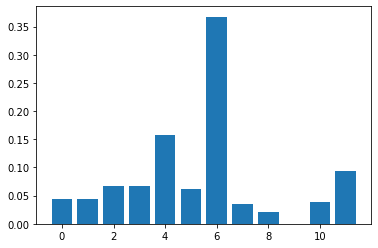

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()